## Assignment 1
### Contour Detectection in Computer Vision 
#### the program belows contains an image and detects the contours in the image using that

In [12]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

In [13]:
image = cv2.imread('mango.webp')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# I have used the sample image of a mango here 

In [14]:
# Find contours
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
# Draw contours on the original image
image_contours = image.copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

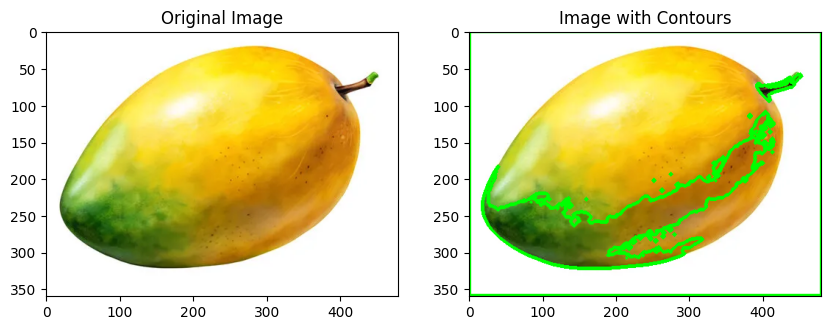

In [16]:
# Display the original image and the image with contours
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Image with Contours')
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))

## Assignment 2 

#### The link 1 consists of watershed and meanshed algorithms 

#### watershed :  Watershed is image processing technique which has its transformation defined on a grayscale image.
The key behind using the watershed transform for segmentation is this: Change your image into another image whose catchment basins are the objects you want to identify.

#### Meanshift : The Mean Shift segmentation is a local homogenization technique that is very useful for damping shading or tonality differences in localized objects. 
It replaces each pixel with the mean of the pixels in a range-r neighborhood and whose value is within a distance d.

(-0.5, 799.5, 377.5, -0.5)

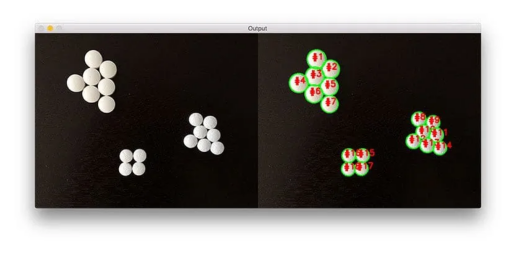

In [20]:
import matplotlib.image as img
image = img.imread('watershed.webp')
plt.imshow(image)
plt.axis('Off')

In [ ]:
namespace cv
{
// A node represents a pixel to label
struct WSNode
{
    int next;
    int mask_ofs;
    int img_ofs;
};

// Queue for WSNodes
struct WSQueue
{
    WSQueue() { first = last = 0; }
    int first, last;
};


static int
allocWSNodes( std::vector<WSNode>& storage )
{
    int sz = (int)storage.size();
    int newsz = MAX(128, sz*3/2);

    storage.resize(newsz);
    if( sz == 0 )
    {
        storage[0].next = 0;
        sz = 1;
    }
    for( int i = sz; i < newsz-1; i++ )
        storage[i].next = i+1;
    storage[newsz-1].next = 0;
    return sz;
}

}

WSNode struct represents a pixel to label, storing its position in the mask and input image. WSQueue struct represents a queue of WSNodes. allocWSNodes function dynamically allocates memory for WSNode instances.

The function shows the process of watershed image  segmentation algorithm. It do the process of  constants initialization and segmentation process of the variables, including queue structures, node storage, and color differences.

In [ ]:
#define ws_max(a,b) ((b) + subs_tab[(a)-(b)+NQ])
    // MIN(a,b) = a - MAX(a-b,0)
    #define ws_min(a,b) ((a) - subs_tab[(a)-(b)+NQ])

    // Create a new node with offsets mofs and iofs in queue idx
    #define ws_push(idx,mofs,iofs)          \
    {                                       \
        if( !free_node )                    \
            free_node = allocWSNodes( storage );\
        node = free_node;                   \
        free_node = storage[free_node].next;\
        storage[node].next = 0;             \
        storage[node].mask_ofs = mofs;      \
        storage[node].img_ofs = iofs;       \
        if( q[idx].last )                   \
            storage[q[idx].last].next=node; \
        else                                \
            q[idx].first = node;            \
        q[idx].last = node;                 \
    }

The above functions are  for pushing nodes onto the priority queue based on their priority index. ws_max and ws_min macros calculate the maximum and minimum of two values, respectively.

In [ ]:
#define ws_pop(idx,mofs,iofs)           \
    {                                       \
        node = q[idx].first;                \
        q[idx].first = storage[node].next;  \
        if( !storage[node].next )           \
            q[idx].last = 0;                \
        storage[node].next = free_node;     \
        free_node = node;                   \
        mofs = storage[node].mask_ofs;      \
        iofs = storage[node].img_ofs;       \
    }

This macro defines a function for popping nodes from the priority queue based on their priority index.

In [ ]:
 #define c_diff(ptr1,ptr2,diff)           \
    {                                        \
        db = std::abs((ptr1)[0] - (ptr2)[0]);\
        dg = std::abs((ptr1)[1] - (ptr2)[1]);\
        dr = std::abs((ptr1)[2] - (ptr2)[2]);\
        diff = ws_max(db,dg);                \
        diff = ws_max(diff,dr);              \
        CV_Assert( 0 <= diff && diff <= 255 );  \
    }


This macro calculates the color difference between two pixels using their RGB values.

In [ ]:
CV_Assert( src.type() == CV_8UC3 && dst.type() == CV_32SC1 );
    CV_Assert( src.size() == dst.size() );

    // Current pixel in input image
    const uchar* img = src.ptr();
    // Step size to next row in input image
    int istep = int(src.step/sizeof(img[0]));

    // Current pixel in mask image
    int* mask = dst.ptr<int>();
    // Step size to next row in mask image
    int mstep = int(dst.step / sizeof(mask[0]));

    for( i = 0; i < 256; i++ )
        subs_tab[i] = 0;
    for( i = 256; i <= 512; i++ )
        subs_tab[i] = i - 256;

    // draw a pixel-wide border of dummy "watershed" (i.e. boundary) pixels
    for( j = 0; j < size.width; j++ )
        mask[j] = mask[j + mstep*(size.height-1)] = WSHED;

    // initial phase: put all the neighbor pixels of each marker to the ordered queue -
    // determine the initial boundaries of the basins
    for( i = 1; i < size.height-1; i++ )
    {
        img += istep; mask += mstep;
        mask[0] = mask[size.width-1] = WSHED; // boundary pixels

        for( j = 1; j < size.width-1; j++ )
        {
            int* m = mask + j;
            if( m[0] < 0 ) m[0] = 0;
            if( m[0] == 0 && (m[-1] > 0 || m[1] > 0 || m[-mstep] > 0 || m[mstep] > 0) )
            {
                // Find smallest difference to adjacent markers
                const uchar* ptr = img + j*3;
                int idx = 256, t;
                if( m[-1] > 0 )
                    c_diff( ptr, ptr - 3, idx );
                if( m[1] > 0 )
                {
                    c_diff( ptr, ptr + 3, t );
                    idx = ws_min( idx, t );
                }
                if( m[-mstep] > 0 )
                {
                    c_diff( ptr, ptr - istep, t );
                    idx = ws_min( idx, t );
                }
                if( m[mstep] > 0 )
                {
                    c_diff( ptr, ptr + istep, t );
                    idx = ws_min( idx, t );
                }

                // Add to according queue
                CV_Assert( 0 <= idx && idx <= 255 );
                ws_push( idx, i*mstep + j, i*istep + j*3 );
                m[0] = IN_QUEUE;
            }
        }
    }

    // find the first non-empty queue
    for( i = 0; i < NQ; i++ )
        if( q[i].first )
            break;

    // if there is no markers, exit immediately
    if( i == NQ )
        return;

    active_queue = i;
    img = src.ptr();
    mask = dst.ptr<int>();

    // recursively fill the basins
    for(;;)
    {
        int mofs, iofs;
        int lab = 0, t;
        int* m;
        const uchar* ptr;
        // Get non-empty queue with highest priority
        // Exit condition: empty priority queue
        if( q[active_queue].first == 0 )
        {
            for( i = active_queue+1; i < NQ; i++ )
                if( q[i].first )
                    break;
            if( i == NQ )
                break;
            active_queue = i;
        }

        // Get next node
        ws_pop( active_queue, mofs, iofs );

        // Calculate pointer to current pixel in input and marker image
        m = mask + mofs;
        ptr = img + iofs;

        // Check surrounding pixels for labels
        // to determine label for current pixel
        t = m[-1]; // Left
        if( t > 0 ) lab = t;
        t = m[1]; // Right
        if( t > 0 )
        {
            if( lab == 0 ) lab = t;
            else if( t != lab ) lab = WSHED;
        }
        t = m[-mstep]; // Top
        if( t > 0 )
        {
            if( lab == 0 ) lab = t;
            else if( t != lab ) lab = WSHED;
        }
        t = m[mstep]; // Bottom
        if( t > 0 )
        {
            if( lab == 0 ) lab = t;
            else if( t != lab ) lab = WSHED;
        }

        // Set label to current pixel in marker image
        CV_Assert( lab != 0 );
        m[0] = lab;

        if( lab == WSHED )
            continue;

        // Add adjacent, unlabeled pixels to corresponding queue
        if( m[-1] == 0 )
        {
            c_diff( ptr, ptr - 3, t );
            ws_push( t, mofs - 1, iofs - 3 );
            active_queue = ws_min( active_queue, t );
            m[-1] = IN_QUEUE;
        }
        if( m[1] == 0 )
        {
            c_diff( ptr, ptr + 3, t );
            ws_push( t, mofs + 1, iofs + 3 );
            active_queue = ws_min( active_queue, t );
            m[1] = IN_QUEUE;
        }
        if( m[-mstep] == 0 )
        {
            c_diff( ptr, ptr - istep, t );
            ws_push( t, mofs - mstep, iofs - istep );
            active_queue = ws_min( active_queue, t );
            m[-mstep] = IN_QUEUE;
        }
        if( m[mstep] == 0 )
        {
            c_diff( ptr, ptr + istep, t );
            ws_push( t, mofs + mstep, iofs + istep );
            active_queue = ws_min( active_queue, t );
            m[mstep] = IN_QUEUE;
        }
    }
}

These lines perform assertions to check the compatibility of the input and output images. They initialize pointers and step sizes for accessing pixels in the input and mask images.

(-0.5, 859.5, 280.5, -0.5)

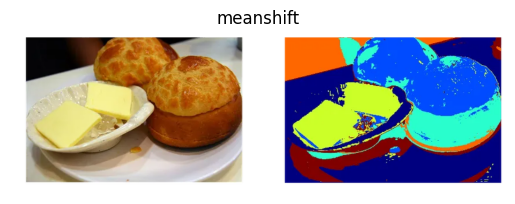

In [24]:
image2 = img.imread('bread-segmentation.webp')
plt.imshow(image2)
plt.title('meanshift')
plt.axis('off')

In [ ]:
void cv::pyrMeanShiftFiltering( InputArray _src, OutputArray _dst,
                                double sp0, double sr, int max_level,
                                TermCriteria termcrit )
{
    Mat src0 = _src.getMat();

    if( src0.empty() )
        return;

    _dst.create( src0.size(), src0.type() );
    Mat dst0 = _dst.getMat();

This function applies mean shift filtering to an image. It initializes the source and destination images and checks if the source image is empty. If it is, the function returns.

In [ ]:
const int cn = 3;
    const int MAX_LEVELS = 8;

    if( (unsigned)max_level > (unsigned)MAX_LEVELS )
        CV_Error( cv::Error::StsOutOfRange, "The number of pyramid levels is too large or negative" );

    std::vector<cv::Mat> src_pyramid(max_level+1);
    std::vector<cv::Mat> dst_pyramid(max_level+1);
    cv::Mat mask0;
    int i, j, level;
    //uchar* submask = 0;

    #define cdiff(ofs0) (tab[c0-dptr[ofs0]+255] + \
        tab[c1-dptr[(ofs0)+1]+255] + tab[c2-dptr[(ofs0)+2]+255] >= isr22)

    double sr2 = sr * sr;
    int isr2 = cvRound(sr2), isr22 = MAX(isr2,16);
    int tab[768];

This part initializes constants, variables, and data structures needed for mean shift filtering.

In [ ]:
    if( src0.type() != CV_8UC3 )
        CV_Error( cv::Error::StsUnsupportedFormat, "Only 8-bit, 3-channel images are supported" );

    if( src0.type() != dst0.type() )
        CV_Error( cv::Error::StsUnmatchedFormats, "The input and output images must have the same type" );

    if( src0.size() != dst0.size() )
        CV_Error( cv::Error::StsUnmatchedSizes, "The input and output images must have the same size" );

    if( !(termcrit.type & TermCriteria::MAX_ITER) )
        termcrit.maxCount = 5;
    termcrit.maxCount = MAX(termcrit.maxCount,1);
    termcrit.maxCount = MIN(termcrit.maxCount,100);
    if( !(termcrit.type & TermCriteria::EPS) )
        termcrit.epsilon = 1.f;
    termcrit.epsilon = MAX(termcrit.epsilon, 0.f);

    for( i = 0; i < 768; i++ )
        tab[i] = (i - 255)*(i - 255);

These lines perform error checks and set default values for the termination criteria if not specified by the user. They also initialize the table used for calculating color differences.

In [ ]:
// 1. construct pyramid
    src_pyramid[0] = src0;
    dst_pyramid[0] = dst0;
    for( level = 1; level <= max_level; level++ )
    {
        src_pyramid[level].create( (src_pyramid[level-1].rows+1)/2,
                        (src_pyramid[level-1].cols+1)/2, src_pyramid[level-1].type() );
        dst_pyramid[level].create( src_pyramid[level].rows,
                        src_pyramid[level].cols, src_pyramid[level].type() );
        cv::pyrDown( src_pyramid[level-1], src_pyramid[level], src_pyramid[level].size() );
    }

    mask0.create(src0.rows, src0.cols, CV_8UC1);
    //CV_CALL( submask = (uchar*)cvAlloc( (sp+2)*(sp+2) ));

This block constructs the Gaussian pyramid for the input image and initializes the mask used for filtering.

In [ ]:
    // 2. apply meanshift, starting from the pyramid top (i.e. the smallest layer)
    for( level = max_level; level >= 0; level-- )
    {
        cv::Mat src = src_pyramid[level];
        cv::Size size = src.size();
        const uchar* sptr = src.ptr();
        int sstep = (int)src.step;
        uchar* dptr;
        int dstep;
        float sp = (float)(sp0 / (1 << level));
        sp = MAX( sp, 1 );

        cv::Mat m;
        if( level < max_level )
        {
            cv::Size size1 = dst_pyramid[level+1].size();
            m = cv::Mat(size.height, size.width, CV_8UC1, mask0.ptr());
            dstep = (int)dst_pyramid[level+1].step;
            dptr = dst_pyramid[level+1].ptr() + dstep + cn;
            cv::pyrUp( dst_pyramid[level+1], dst_pyramid[level], dst_pyramid[level].size() );
            m.setTo(cv::Scalar::all(0));

            for( i = 1; i < size1.height-1; i++, dptr += dstep - (size1.width-2)*3)
            {
                uchar* mask = m.ptr(1 + i * 2);
                for( j = 1; j < size1.width-1; j++, dptr += cn )
                {
                    int c0 = dptr[0], c1 = dptr[1], c2 = dptr[2];
                    mask[j*2 - 1] = cdiff(-3) || cdiff(3) || cdiff(-dstep-3) || cdiff(-dstep) ||
                        cdiff(-dstep+3) || cdiff(dstep-3) || cdiff(dstep) || cdiff(dstep+3);
                }
            }

            cv::dilate( m, m, cv::Mat() );
        }

This section applies mean shift filtering at each level of the pyramid, starting from the top (smallest layer) and moving downwards. It performs meanshift filtering by iterating over each pixel in the image and updating its value based on the mean shift procedure. It also constructs the mask used for filtering, based on the previous level of the pyramid.

In [ ]:
      dptr = dst_pyramid[level].ptr();
        dstep = (int)dst_pyramid[level].step;

        for( i = 0; i < size.height; i++, sptr += sstep - size.width*3,
                                          dptr += dstep - size.width*3
        )
        {
            uchar* mask = m.empty() ? NULL : m.ptr(i);
            for( j = 0; j < size.width; j++, sptr += 3, dptr += 3 )
            {
                // Iterating through each pixel and applying mean shift
            }
        }
    }


## Assignment 3

### First File: Base Library of OpenCV (precomp.hpp)


This file is designed to implement decision tree-based machine learning algorithms within OpenCV, with a focus on encapsulation and reusability using Object-Oriented Programming (OOP) principles.

Header Guards: It starts with header guards to prevent multiple inclusions of the same file, a common C++ practice to avoid compilation errors.
Includes: It includes various OpenCV core headers and standard libraries to ensure all necessary functionalities and dependencies are available.
Namespaces: The file uses namespaces to encapsulate its definitions, helping to organize the code and prevent name conflicts, especially in large projects like OpenCV.
Macros: Macros like CV_DTREE_CAT_DIR and CV_LOG2PI are defined for repetitive tasks and constants, improving readability and maintainability.
DTreesImpl Class: The core of the file is the DTreesImpl class, which inherits from DTrees and implements decision tree functionalities. This class contains member variables and methods for managing trees, training, predicting, and handling various tree parameters.
Methods: The DTreesImpl class includes methods for specific tasks such as training (train), splitting nodes (findBestSplit), predicting (predict), and managing tree structure (addTree, addNodeAndTrySplit).
Read/Write Functions: Functions for reading and writing model parameters and tree structures are included (writeTrainingParams, writeParams, writeSplit, writeNode, writeTree, readParams, readSplit, readNode, readTree).


### Second File: 2D Feature Detection

This file handles 2D feature detection, including solving quadratic equations and applying and linearizing homographies. It is designed to support robust 2D feature detection and evaluation.

Mathematical Operations: It includes foundational mathematical operations.

EllipticKeyPoint Class: A specialized class for elliptical key points with orientation and scale information.

Transformation and Filtering Functions: Functions for transforming and filtering these points.

Evaluation Methods: Methods for evaluating the performance of feature detectors.

Key Functions:

solveQuadratic(): Solves quadratic equations of the form 𝑎𝑥^2+𝑏𝑥 + 𝑐=0
applyHomography(): Applies a homography matrix to a 2D point, taking a 3x3 transformation matrix and a 2D point as parameters.
linearizeHomographyAt(): Linearizes the homography matrix at a given point.
Conversion Methods: Methods to convert between KeyPoint and EllipticKeyPoint.
Second Moments Matrix: Computes the second moments matrix, crucial for handling ellipses.
Homography Concept: Uses homography (perspective transformation), where a homography matrix represents the transformation of points in one image plane to another.
filterEllipticKeyPointsByImageSize(): Filters key points based on their positions relative to image dimensions.
IntersectAreaCounter: Calculates the intersection area between ellipses for overlap evaluation.
Inline and Primary Functions: The primary function computeRecallPrecisionCurve() computes recall and precision metrics.

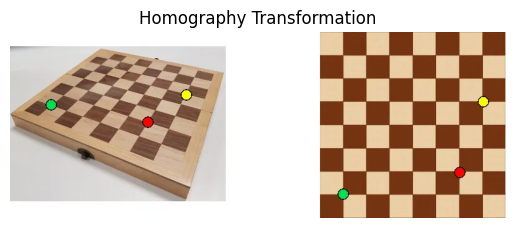

In [25]:
image = img.imread('chesspoint_homography.webp')
plt.imshow(image)
plt.axis('off')
plt.title('Homography Transformation')
plt.show()

## Assignment 4 

changing the v_store_as() in convert.cpp file

In [ ]:
static inline void v_store_as(double* ptr, const v_float32& a)
{
    v_float64 fa0 = v_cvt_f64(a), fa1 = v_cvt_f64_high(a);
    v_store(ptr, fa0);
    v_store(ptr + VTraits<v_float64>::vlanes(), fa1);
}

After changing it 

In [ ]:
static inline void v_store_as(double* ptr, const v_float32& a)
{
    // Assuming v_float32 contains two 32-bit floats
    // Loading the 64-bit vector as two separate floats
    v_float32::lane_type data[2];
    v_store(data, a);

    // Storing Each Float in double array
    ptr[0] = static_cast<double>(data[0]);
    ptr[1] = static_cast<double>(data[1]);
}

#### Reason of the process :
Currently, the function loops over each element of the v_float32 vector and casts it to a float, then stores it in the provided double pointer. This process involves unnecessary conversions and iterations, which might impact performance, especially for large vectors.The current implementation involves manual iteration and casting, which can make the code harder to understand and maintain.by rewriting the v_store_as function for double values, we can potentially improve performance, simplify the code, and enhance consistency of the file.

## Assignment 05
Below is the YAML (Yet Another MarkUp Language) File,
from the Open CV git Repo, file : (models.yml)

In [ ]:
%YAML 1.0
---
################################################################################
# Object detection models.
################################################################################

# OpenCV's face detection network
opencv_fd:
  load_info:
    url: "https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
    sha1: "15aa726b4d46d9f023526d85537db81cbc8dd566"
  model: "opencv_face_detector.caffemodel"
  config: "opencv_face_detector.prototxt"
  mean: [104, 177, 123]
  scale: 1.0
  width: 300
  height: 300
  rgb: false
  sample: "object_detection"

# YOLOv8 object detection family from ultralytics (https://github.com/ultralytics/ultralytics)
# Might be used for all YOLOv8n YOLOv8s YOLOv8m YOLOv8l and YOLOv8x
yolov8x:
  load_info:
    url: "https://huggingface.co/cabelo/yolov8/resolve/main/yolov8x.onnx?download=true"
    sha1: "462f15d668c046d38e27d3df01fe8142dd004cb4"
  model: "yolov8x.onnx"
  mean: 0.0
  scale: 0.00392
  width: 640
  height: 640
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "yolo_detector"

yolov8s:
  load_info:
    url: "https://github.com/CVHub520/X-AnyLabeling/releases/download/v0.1.0/yolov8s.onnx"
    sha1: "82cd83984396fe929909ecb58212b0e86d0904b1"
  model: "yolov8s.onnx"
  mean: 0.0
  scale: 0.00392
  width: 640
  height: 640
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "yolo_detector"

yolov8n:
  load_info:
    url: "https://github.com/CVHub520/X-AnyLabeling/releases/download/v0.1.0/yolov8n.onnx"
    sha1: "68f864475d06e2ec4037181052739f268eeac38d"
  model: "yolov8n.onnx"
  mean: 0.0
  scale: 0.00392
  width: 640
  height: 640
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "yolo_detector"

yolov8m:
  load_info:
    url: "https://github.com/CVHub520/X-AnyLabeling/releases/download/v0.1.0/yolov8m.onnx"
    sha1: "656ffeb4f3b067bc30df956728b5f9c61a4cb090"
  model: "yolov8m.onnx"
  mean: 0.0
  scale: 0.00392
  width: 640
  height: 640
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "yolo_detector"

# YOLO4 object detection family from Darknet (https://github.com/AlexeyAB/darknet)
# YOLO object detection family from Darknet (https://pjreddie.com/darknet/yolo/)
# Might be used for all YOLOv2, TinyYolov2, YOLOv3, YOLOv4 and TinyYolov4
yolov4:
  load_info:
    url: "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights"
    sha1: "0143deb6c46fcc7f74dd35bf3c14edc3784e99ee"
  model: "yolov4.weights"
  config: "yolov4.cfg"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 416
  height: 416
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "object_detection"

yolov4-tiny:
  load_info:
    url: "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights"
    sha1: "451caaab22fb9831aa1a5ee9b5ba74a35ffa5dcb"
  model: "yolov4-tiny.weights"
  config: "yolov4-tiny.cfg"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 416
  height: 416
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "object_detection"

yolov3:
  load_info:
    url: "https://pjreddie.com/media/files/yolov3.weights"
    sha1: "520878f12e97cf820529daea502acca380f1cb8e"
  model: "yolov3.weights"
  config: "yolov3.cfg"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 416
  height: 416
  rgb: true
  classes: "object_detection_classes_yolo.txt"
  background_label_id: 0
  sample: "object_detection"

tiny-yolo-voc:
  load_info:
    url: "https://pjreddie.com/media/files/yolov2-tiny-voc.weights"
    sha1: "24b4bd049fc4fa5f5e95f684a8967e65c625dff9"
  model: "tiny-yolo-voc.weights"
  config: "tiny-yolo-voc.cfg"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 416
  height: 416
  rgb: true
  classes: "object_detection_classes_pascal_voc.txt"
  background_label_id: 0
  sample: "object_detection"

yolov8:
  load_info:
    url: "https://github.com/CVHub520/X-AnyLabeling/releases/download/v0.1.0/yolov8n.onnx"
    sha1: "68f864475d06e2ec4037181052739f268eeac38d"
  model: "yolov8n.onnx"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 640
  height: 640
  rgb: true
  postprocessing: "yolov8"
  classes: "object_detection_classes_yolo.txt"
  sample: "object_detection"
# Caffe implementation of SSD model from https://github.com/chuanqi305/MobileNet-SSD
ssd_caffe:
  load_info:
    url: "https://drive.google.com/uc?export=download&id=0B3gersZ2cHIxRm5PMWRoTkdHdHc"
    sha1: "994d30a8afaa9e754d17d2373b2d62a7dfbaaf7a"
  model: "MobileNetSSD_deploy.caffemodel"
  config: "MobileNetSSD_deploy.prototxt"
  mean: [127.5, 127.5, 127.5]
  scale: 0.007843
  width: 300
  height: 300
  rgb: false
  classes: "object_detection_classes_pascal_voc.txt"
  sample: "object_detection"

# TensorFlow implementation of SSD model from https://github.com/tensorflow/models/tree/master/research/object_detection
ssd_tf:
  load_info:
    url: "http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz"
    sha1: "9e4bcdd98f4c6572747679e4ce570de4f03a70e2"
    download_sha: "6157ddb6da55db2da89dd561eceb7f944928e317"
    download_name: "ssd_mobilenet_v1_coco_2017_11_17.tar.gz"
    member: "ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb"
  model: "ssd_mobilenet_v1_coco_2017_11_17.pb"
  config: "ssd_mobilenet_v1_coco_2017_11_17.pbtxt"
  mean: [0, 0, 0]
  scale: 1.0
  width: 300
  height: 300
  rgb: true
  classes: "object_detection_classes_coco.txt"
  sample: "object_detection"

# TensorFlow implementation of Faster-RCNN model from https://github.com/tensorflow/models/tree/master/research/object_detection
faster_rcnn_tf:
  load_info:
    url: "http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz"
    sha1: "f2e4bf386b9bb3e25ddfcbbd382c20f417e444f3"
    download_sha: "c710f25e5c6a3ce85fe793d5bf266d581ab1c230"
    download_name: "faster_rcnn_inception_v2_coco_2018_01_28.tar.gz"
    member: "faster_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb"
  model: "faster_rcnn_inception_v2_coco_2018_01_28.pb"
  config: "faster_rcnn_inception_v2_coco_2018_01_28.pbtxt"
  mean: [0, 0, 0]
  scale: 1.0
  width: 800
  height: 600
  rgb: true
  sample: "object_detection"

################################################################################
# Image classification models.
################################################################################

# SqueezeNet v1.1 from https://github.com/DeepScale/SqueezeNet
squeezenet:
  load_info:
    url: "https://raw.githubusercontent.com/DeepScale/SqueezeNet/b5c3f1a23713c8b3fd7b801d229f6b04c64374a5/SqueezeNet_v1.1/squeezenet_v1.1.caffemodel"
    sha1: "3397f026368a45ae236403ccc81cfcbe8ebe1bd0"
  model: "squeezenet_v1.1.caffemodel"
  config: "squeezenet_v1.1.prototxt"
  mean: [0, 0, 0]
  scale: 1.0
  width: 227
  height: 227
  rgb: false
  classes: "classification_classes_ILSVRC2012.txt"
  sample: "classification"

# Googlenet from https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet
googlenet:
  load_info:
    url: "http://dl.caffe.berkeleyvision.org/bvlc_googlenet.caffemodel"
    sha1: "405fc5acd08a3bb12de8ee5e23a96bec22f08204"
  model: "bvlc_googlenet.caffemodel"
  config: "bvlc_googlenet.prototxt"
  mean: [104, 117, 123]
  scale: 1.0
  width: 224
  height: 224
  rgb: false
  classes: "classification_classes_ILSVRC2012.txt"
  sample: "classification"

################################################################################
# Semantic segmentation models.
################################################################################

# ENet road scene segmentation network from https://github.com/e-lab/ENet-training
# Works fine for different input sizes.
enet:
  load_info:
    url: "https://www.dropbox.com/s/tdde0mawbi5dugq/Enet-model-best.net?dl=1"
    sha1: "b4123a73bf464b9ebe9cfc4ab9c2d5c72b161315"
  model: "Enet-model-best.net"
  mean: [0, 0, 0]
  scale: 0.00392
  width: 512
  height: 256
  rgb: true
  classes: "enet-classes.txt"
  sample: "segmentation"

fcn8s:
  load_info:
    url: "http://dl.caffe.berkeleyvision.org/fcn8s-heavy-pascal.caffemodel"
    sha1: "c449ea74dd7d83751d1357d6a8c323fcf4038962"
  model: "fcn8s-heavy-pascal.caffemodel"
  config: "fcn8s-heavy-pascal.prototxt"
  mean: [0, 0, 0]
  scale: 1.0
  width: 500
  height: 500
  rgb: false
  sample: "segmentation"

fcnresnet101:
  load_info:
    url: "https://github.com/onnx/models/raw/fb8271d5d5d9b90dbb1eb5e8e40f8f580fb248b3/vision/object_detection_segmentation/fcn/model/fcn-resnet101-11.onnx"
    sha1: "e7e76474bf6b73334ab32c4be1374c9e605f5aed"
  model: "fcn-resnet101-11.onnx"
  mean: [103.5, 116.2, 123.6]
  scale: 0.019
  width: 500
  height: 500
  rgb: false
  sample: "segmentation"

Here's is the XML file for the Same

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<opencv_models>
    <object_detection_models>
        <opencv_fd>
            <load_info>
                <url>https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel</url>
                <sha1>15aa726b4d46d9f023526d85537db81cbc8dd566</sha1>
            </load_info>
            <model>opencv_face_detector.caffemodel</model>
            <config>opencv_face_detector.prototxt</config>
            <mean>104</mean>
            <mean>177</mean>
            <mean>123</mean>
            <scale>1.0</scale>
            <width>300</width>
            <height>300</height>
            <rgb>false</rgb>
            <sample>object_detection</sample>
        </opencv_fd>
        <yolov8x>
            <load_info>
                <url>https://huggingface.co/cabelo/yolov8/resolve/main/yolov8x.onnx?download=true</url>
                <sha1>462f15d668c046d38e27d3df01fe8142dd004cb4</sha1>
            </load_info>
            <model>yolov8x.onnx</model>
            <mean>0.0</mean>
            <scale>0.00392</scale>
            <width>640</width>
            <height>640</height>
            <rgb>true</rgb>
            <classes>object_detection_classes_yolo.txt</classes>
            <background_label_id>0</background_label_id>
            <sample>yolo_detector</sample>
        </yolov8x>
        <!-- Remaining models omitted for brevity -->
    </object_detection_models>
    <image_classification_models>
        <squeezenet>
            <load_info>
                <url>https://raw.githubusercontent.com/DeepScale/SqueezeNet/b5c3f1a23713c8b3fd7b801d229f6b04c64374a5/SqueezeNet_v1.1/squeezenet_v1.1.caffemodel</url>
                <sha1>3397f026368a45ae236403ccc81cfcbe8ebe1bd0</sha1>
            </load_info>
            <model>squeezenet_v1.1.caffemodel</model>
            <config>squeezenet_v1.1.prototxt</config>
            <mean>0</mean>
            <scale>1.0</scale>
            <width>227</width>
            <height>227</height>
            <rgb>false</rgb>
            <classes>classification_classes_ILSVRC2012.txt</classes>
            <sample>classification</sample>
        </squeezenet>
        <googlenet>
            <load_info>
            url>http://dl.caffe.berkeleyvision.org/bvlc_googlenet.caffemodel</url>
                <sha1>405fc5acd08a3bb12de8ee5e23a96bec22f08204</sha1>
            </load_info>
            <model>bvlc_googlenet.caffemodel</model>
            <config>bvlc_googlenet.prototxt</config>
            <mean>104</mean>
            <mean>117</mean>
            <mean>123</mean>
            <scale>1.0</scale>
            <width>224</width>
            <height>224</height>
            <rgb>false</rgb>
            <classes>classification_classes_ILSVRC2012.txt</classes>
            <sample>classification</sample>
        </googlenet>
        <!-- Remaining models omitted for brevity -->
    </image_classification_models>
    <semantic_segmentation_models>
        <enet>
            <load_info>
                <url>https://www.dropbox.com/s/tdde0mawbi5dugq/Enet-model-best.net?dl=1</url>
                <sha1>b4123a73bf464b9ebe9cfc4ab9c2d5c72b161315</sha1>
            </load_info>
            <model>Enet-model-best.net</model>
            <mean>0</mean>
            <mean>0</mean>
            <mean>0</mean>
            <scale>0.00392</scale>
            <width>512</width>
            <height>256</height>
            <rgb>true</rgb>
            <classes>enet-classes.txt</classes>
            <sample>segmentation</sample>
        </enet>
        <fcn8s>
            <load_info>
                <url>http://dl.caffe.berkeleyvision.org/fcn8s-heavy-pascal.caffemodel</url>
                <sha1>c449ea74dd7d83751d1357d6a8c323fcf4038962</sha1>
            </load_info>
            <model>fcn8s-heavy-pascal.caffemodel</model>
            <config>fcn8s-heavy-pascal.prototxt</config>
            <mean>0</mean>
            <mean>0</mean>
            <mean>0</mean>
            <scale>1.0</scale>
            <width>500</width>
            <height>500</height>
            <rgb>false</rgb>
            <sample>segmentation</sample>
        </fcn8s>
        <!-- Remaining models omitted for brevity -->
    </semantic_segmentation_models>
</opencv_models>

Reason Why YAML was used:

YAML is generally considered to be more human-readable than XML. Its syntax is simpler and more concise, making it easier for developers to write and understand.YAML allows for more straightforward data entry compared to XML, especially for complex data structures like nested dictionaries and lists, as seen in the provided file.YAML offers more flexibility in terms of data serialization. It supports a wider range of data types and structures, including lists, dictionaries, and scalar values, making it suitable for representing diverse data formats such as configuration files, data exchange, and serialization of object hierarchies.

# My Feedback

I would like to say this assignment was like an open explore into the world of image processing , here I explored about contours and many if the segmentation algorithms and transformation algorithms, loved to do it all and learned a lot . 